In [15]:
import numpy as np

In [16]:
np.random.seed(1) # 可重复性研究

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv("data/creditcard.csv")

In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
df.shape

(284807, 31)

In [21]:
y = df['Class']
X = df.drop(['Time', 'Class'], axis = 1)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# ?train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [25]:
from keras.models import Model
from keras.layers import Dense, Input

In [27]:
input_dim = 29
outer_layer_dim = 14
inner_layer_dim = 7

In [30]:
input_layer = Input(shape=(input_dim,))
encoder =  Dense(units=outer_layer_dim, activation='relu')(input_layer)
encoder = Dense(units=inner_layer_dim, activation='relu')(encoder)
decoder = Dense(units=inner_layer_dim)(encoder)
decoder = Dense(units=outer_layer_dim)(decoder)
decoder = Dense(units=input_dim)(decoder)
autoencoder = Model(inputs=input_layer, outputs = decoder)

In [33]:
# ?autoencoder.compile

In [35]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = autoencoder.fit(X_train, X_train, epochs = 10, batch_size = 32, validation_split=0.2)

Train on 205060 samples, validate on 51266 samples
Epoch 1/10
205060/205060 [==============================] - 10s 46us/step - loss: 1.4747 - accuracy: 0.8952 - val_loss: 0.6700 - val_accuracy: 0.9024
Epoch 2/10
205060/205060 [==============================] - 9s 44us/step - loss: 1.9759 - accuracy: 0.9020 - val_loss: 0.7568 - val_accuracy: 0.9097
Epoch 3/10
205060/205060 [==============================] - 10s 47us/step - loss: 1.3497 - accuracy: 0.9099 - val_loss: 0.7180 - val_accuracy: 0.9171
Epoch 4/10
205060/205060 [==============================] - 9s 45us/step - loss: 1.3842 - accuracy: 0.9131 - val_loss: 0.7483 - val_accuracy: 0.9096
Epoch 5/10
205060/205060 [==============================] - 9s 46us/step - loss: 1.4144 - accuracy: 0.9164 - val_loss: 0.6117 - val_accuracy: 0.9220
Epoch 6/10
205060/205060 [==============================] - 10s 47us/step - loss: 1.7943 - accuracy: 0.9158 - val_loss: 0.6704 - val_accuracy: 0.9156
Epoch 7/10
205060/205060 [==========================

In [36]:
autoencoder.save("model/creditcard_autoencoders_model.h5")

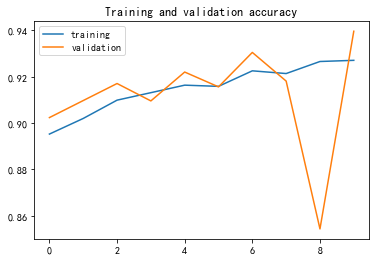

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.title('Training and validation accuracy')
plt.show()

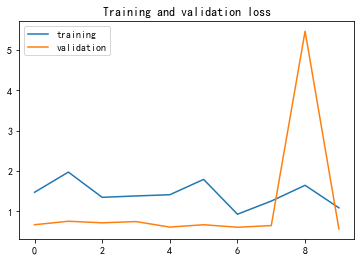

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc='upper left')
plt.title('Training and validation loss')
plt.show()

In [45]:
from keras.models import load_model

In [47]:
autoencoder2 = load_model("model/creditcard_autoencoders_model.h5")
autoencoder2.__class__

keras.engine.training.Model

In [62]:
preds = autoencoder.predict(X_test)

41.3457285360419

```python
for i in range(5):
    # print(i)
    if np.sum(np.square(preds[i] - np.array(X_test)[i]))/30 < 1:
        np.sum(np.square(preds[i] - np.array(X_test)[i]))/30
    else :
        1
```

这种 ifelse 好慢。

In [112]:
y_preds  = np.where(np.sum(np.square(preds - np.array(X_test)), axis = 1)/30 < 1, 
                    np.sum(np.square(preds - np.array(X_test)), axis = 1)/30, 1)

In [114]:
y_preds.__class__

numpy.ndarray

In [116]:
y_preds.shape

(28481,)

In [121]:
import pyks

In [122]:
data = pd.DataFrame({'y': y_test, 'yhat': y_preds})

0.8729222253652495


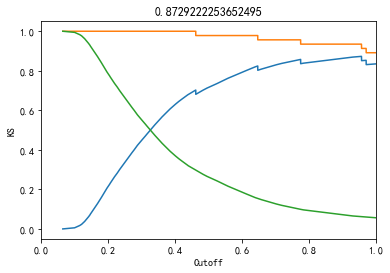

0.8729222253652495

<Figure size 432x288 with 0 Axes>

In [123]:
pyks.plot(data)